In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,auc,roc_curve

In [2]:
x,y = datasets.load_iris(return_X_y=True, as_frame=True)
x.drop(["sepal length (cm)","sepal width (cm)"],axis=1,inplace=True)

In [3]:
x['color'] =y
x

,petal length (cm),petal width (cm),color
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [4]:
x.notnull()
x.notna()

,petal length (cm),petal width (cm),color
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
145,True,True,True
146,True,True,True
147,True,True,True
148,True,True,True


In [5]:
x.quantile(0.5)

petal length (cm)    4.35
petal width (cm)     1.30
color                1.00
Name: 0.5, dtype: float64

In [6]:
x.max()

petal length (cm)    6.9
petal width (cm)     2.5
color                2.0
dtype: float64

In [7]:
x.min()

petal length (cm)    1.0
petal width (cm)     0.1
color                0.0
dtype: float64

In [8]:
x['color'] = y
train, test = train_test_split(x, test_size=0.5)



In [9]:
clf = make_pipeline(SVC(gamma='auto',kernel = 'rbf'))
#poly,rbf,‘sigmoid’

In [10]:
clf.fit(train.drop('color',axis=1), train['color'])

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [11]:
test

,petal length (cm),petal width (cm),color
66,4.5,1.5,1
15,1.5,0.4,0
52,4.9,1.5,1
76,4.8,1.4,1
17,1.4,0.3,0
...,...,...,...
111,5.3,1.9,2
138,4.8,1.8,2
68,4.5,1.5,1
133,5.1,1.5,2


In [12]:
test['predicted'] = clf.predict(test.drop('color',axis=1))
test

,petal length (cm),petal width (cm),color,predicted
66,4.5,1.5,1,1
15,1.5,0.4,0,0
52,4.9,1.5,1,1
76,4.8,1.4,1,1
17,1.4,0.3,0,0
...,...,...,...,...
111,5.3,1.9,2,2
138,4.8,1.8,2,2
68,4.5,1.5,1,1
133,5.1,1.5,2,2


In [13]:
test[test['color'] != test['predicted']]

,petal length (cm),petal width (cm),color,predicted
83,5.1,1.6,1,2
77,5.0,1.7,1,2
70,4.8,1.8,1,2


In [14]:
accuracy_score(test['color'],test['predicted'])

0.96

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def make_prediction_grid(predictors, outcomes, limits, h):
    """Classify each point on the predition grid"""
    (x_min,x_max,y_min,y_max) = limits
    xs = np.arange(x_min, x_max,h)
    ys = np.arange(y_min, y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = clf.predict([p])
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(x['petal length (cm)'],x['petal width (cm)'], c = y, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/rick/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitte

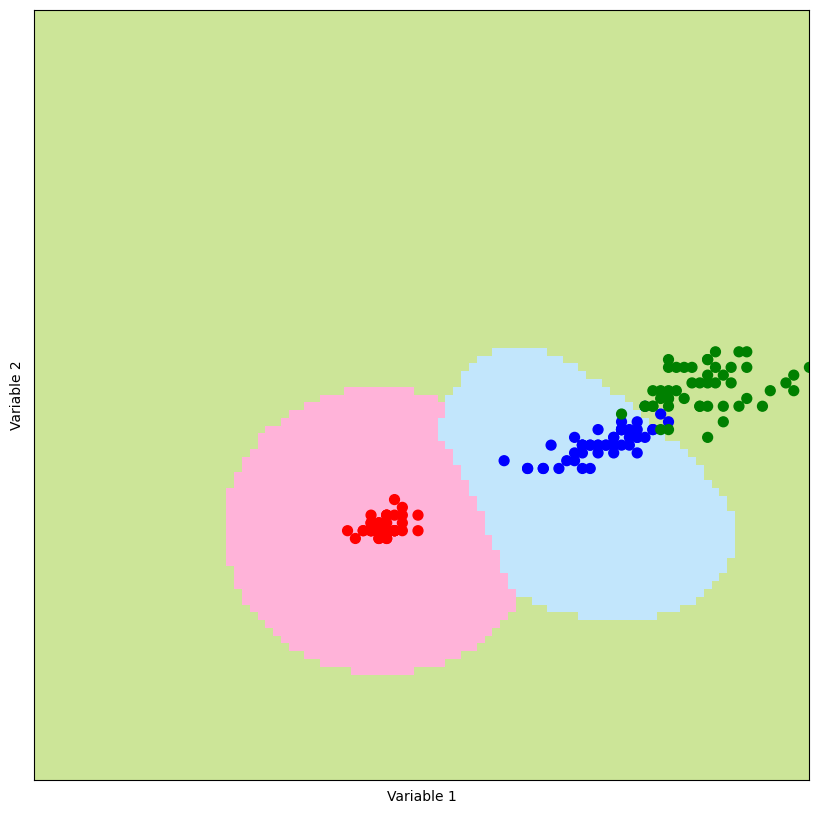

In [16]:
limits = (-3,7,-3,7)
h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(x.drop('color',axis=1),y, limits,h);
plot_prediction_grid(xx,yy,prediction_grid, "test")


In [17]:
x.columns

Index(['petal length (cm)', 'petal width (cm)', 'color'], dtype='object')